In [1]:
import json
import pandas as pd
from pathlib import Path
from pprint import pprint
import datetime
import time
import numpy as np
import matplotlib as plt

import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

%matplotlib inline

In [2]:
def get_seconds(time_str):
    x = time.strptime(time_str.split('.')[0],'%H:%M:%S')
    return datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
def get_average_epoch_duration(metrics):
    seconds = get_seconds(metrics['training_duration'])
    training_epochs = metrics['training_epochs'] + 1
    return seconds / training_epochs

In [3]:
TRAINING_ID = 'Training_ID'
SCENARIO = 'Scenario'
MODEL = 'Model'
REPRESENTATION = 'Representation'
EMBEDDING = 'Embedding'
EMBEDDING_TYPE = 'Embedding_Type'
DOMAIN_SPECIFIC = 'Domain_Specific'
BATCH_SIZE = 'Batch_Size'
ELMO_DROPOUT = 'ELMo_Dropout'
TRAINING_NUMBER = 'Training_Number'
EXECUTION_NUMBER = 'Execution_Number'
BEST_EPOCH = 'Best_Epoch'
TRAINING_EPOCHS = 'Training_Epochs'
TRAINING_DURATION = 'Training_Duration'
TOTAL_DURATION = 'Total_Duration(s)'
AVERAGE_EPOCH_DURATION = 'Average_Epoch_Duration(s)'
TRAINING_ACCURACY = 'Training_Accuracy'
TRAINING_ACCURACY_TOP3 = 'Training_Accuracy_Top-3'
TRAINING_PRECISION = 'Training_Precision'
TRAINING_RECALL = 'Training_Recall'
TRAINING_F1_MEASURE = 'Training_F1-Measure'
TRAINING_LOSS = 'Training_Loss'
BEST_VALIDATION_ACCURACY = 'Best_Validation_Accuracy'
BEST_VALIDATION_ACCURACY_TOP3 = 'Best_Validation_Accuracy_Top-3'
BEST_VALIDATION_PRECISION = 'Best_Validation_Precision'
BEST_VALIDATION_RECALL = 'Best_Validation_Recall'
BEST_VALIDATION_F1_MEASURE = 'Best_Validation_F1-Measure'
BEST_VALIDATION_LOSS = 'Best_Validation_Loss'
TEST_ACCURACY = 'Test_Accuracy'
TEST_ACCURACY_TOP3 = 'Test_Accuracy_Top-3'
TEST_PRECISION = 'Test_Precision'
TEST_RECALL = 'Test_Recall'
TEST_F1_MEASURE = 'Test_F1_Measure'
TEST_LOSS = 'Test_Loss'
columns = [TRAINING_ID, MODEL, REPRESENTATION, EMBEDDING, EMBEDDING_TYPE, DOMAIN_SPECIFIC, EXECUTION_NUMBER, BEST_EPOCH, TRAINING_EPOCHS, TRAINING_DURATION, TOTAL_DURATION, AVERAGE_EPOCH_DURATION, TRAINING_ACCURACY, TRAINING_ACCURACY_TOP3, TRAINING_PRECISION, TRAINING_RECALL, TRAINING_F1_MEASURE, TRAINING_LOSS, BEST_VALIDATION_ACCURACY, BEST_VALIDATION_ACCURACY_TOP3, BEST_VALIDATION_PRECISION, BEST_VALIDATION_RECALL, BEST_VALIDATION_F1_MEASURE, BEST_VALIDATION_LOSS, TEST_ACCURACY, TEST_ACCURACY_TOP3, TEST_PRECISION, TEST_RECALL, TEST_F1_MEASURE, TEST_LOSS]
columns

['Training_ID',
 'Model',
 'Representation',
 'Embedding',
 'Embedding_Type',
 'Domain_Specific',
 'Execution_Number',
 'Best_Epoch',
 'Training_Epochs',
 'Training_Duration',
 'Total_Duration(s)',
 'Average_Epoch_Duration(s)',
 'Training_Accuracy',
 'Training_Accuracy_Top-3',
 'Training_Precision',
 'Training_Recall',
 'Training_F1-Measure',
 'Training_Loss',
 'Best_Validation_Accuracy',
 'Best_Validation_Accuracy_Top-3',
 'Best_Validation_Precision',
 'Best_Validation_Recall',
 'Best_Validation_F1-Measure',
 'Best_Validation_Loss',
 'Test_Accuracy',
 'Test_Accuracy_Top-3',
 'Test_Precision',
 'Test_Recall',
 'Test_F1_Measure',
 'Test_Loss']

In [6]:
pd.set_option('display.max_columns', 1000)
training_data_df = pd.read_csv('training_data_20_epochs_mestrado_datalawyer_qualificacao.csv')
#training_data_df = training_data_df[(training_data_df[EXECUTION_NUMBER]).astype(int) < 1]
training_data_df

,Training_ID,Model,Representation,Embedding,Embedding_Type,Domain_Specific,Execution_Number,Best_Epoch,Training_Epochs,Training_Duration,Total_Duration(s),Average_Epoch_Duration(s),Training_Accuracy,Training_Accuracy_Top-3,Training_Precision,Training_Recall,Training_F1-Measure,Training_Loss,Best_Validation_Accuracy,Best_Validation_Accuracy_Top-3,Best_Validation_Precision,Best_Validation_Recall,Best_Validation_F1-Measure,Best_Validation_Loss,Test_Accuracy,Test_Accuracy_Top-3,Test_Precision,Test_Recall,Test_F1_Measure,Test_Loss
0,datalawyer-ft_ELMo_0,datalawyer-ft,ELMo,No,No,False,0,17,20,1:29:06.965009,5346.0,267.30,0.996784,0.996907,0.965033,0.964245,0.964639,5.799219,0.986831,0.987164,0.872875,0.889307,0.881015,41.361886,0.986340,0.986904,0.851259,0.874608,0.862775,46.262572
1,datalawyer-ft_ELMo+CNN_0,datalawyer-ft,ELMo+CNN,No,No,False,0,12,20,01:39:02,5942.0,297.10,0.996408,0.996580,0.960871,0.958204,0.959536,5.704471,0.988015,0.988237,0.863702,0.906627,0.884644,41.457786,0.985584,0.986076,0.833584,0.867555,0.850230,47.847859
2,datalawyer-ft_ELMo+CNN+Embeddings_wang2vec_cbow_0,datalawyer-ft,ELMo+CNN+Embeddings,wang2vec,cbow,False,0,11,20,01:34:41,5681.0,284.05,0.997111,0.997199,0.969266,0.968000,0.968633,4.979233,0.987090,0.987515,0.895019,0.879518,0.887201,40.891018,0.986728,0.987256,0.877291,0.862853,0.870012,46.374493
3,datalawyer-ft_ELMo+CNN+Embeddings_fasttext-lc_...,datalawyer-ft,ELMo+CNN+Embeddings,fasttext-lc,cbow,True,0,9,20,01:23:34,5014.0,250.70,0.992258,0.992608,0.922241,0.913959,0.918081,11.006428,0.985573,0.985869,0.866862,0.892319,0.879406,29.352689,0.986252,0.986833,0.841787,0.871473,0.856373,31.893377
4,datalawyer-ft_ELMo+CNN+Embeddings_fasttext-lc_...,datalawyer-ft,ELMo+CNN+Embeddings,fasttext-lc,skip,True,0,17,20,01:19:12,4752.0,237.60,0.996988,0.997057,0.965709,0.965551,0.965630,4.847833,0.987571,0.987848,0.873074,0.896084,0.884430,41.505476,0.986640,0.987168,0.848024,0.874608,0.861111,49.398364
5,datalawyer-ft_ELMo+CNN+Embeddings_fasttext_cbow_0,datalawyer-ft,ELMo+CNN+Embeddings,fasttext,cbow,False,0,9,20,01:32:15,5535.0,276.75,0.993975,0.994256,0.934722,0.930449,0.932581,8.851333,0.986887,0.987164,0.873622,0.895331,0.884344,28.907919,0.986516,0.987097,0.843063,0.871473,0.857033,33.769151
6,datalawyer-ft_ELMo+CNN+Embeddings_fasttext_skip_0,datalawyer-ft,ELMo+CNN+Embeddings,fasttext,skip,False,0,19,20,01:27:52,5272.0,263.60,0.997053,0.997168,0.968924,0.967184,0.968053,5.047985,0.987275,0.987645,0.877868,0.893072,0.885405,44.359865,0.986147,0.986728,0.848043,0.865987,0.856921,57.109583
7,datalawyer-ft_ELMo+CNN+Embeddings_glove-lc_jur...,datalawyer-ft,ELMo+CNN+Embeddings,glove-lc,No,True,0,14,20,01:17:47,4667.0,233.35,0.996719,0.996861,0.962563,0.961306,0.961934,5.849738,0.987405,0.987700,0.878788,0.895331,0.886982,39.392929,0.986305,0.986833,0.852623,0.865987,0.859253,45.753375
8,datalawyer-ft_ELMo+CNN+Embeddings_glove_0,datalawyer-ft,ELMo+CNN+Embeddings,glove,No,False,0,17,20,01:31:30,5490.0,274.50,0.997038,0.997145,0.967610,0.965714,0.966661,5.159645,0.987442,0.987793,0.884384,0.887048,0.885714,45.331829,0.985724,0.986270,0.864822,0.857367,0.861078,53.367433
9,datalawyer-ft_ELMo+CNN+Embeddings_wang2vec-lc_...,datalawyer-ft,ELMo+CNN+Embeddings,wang2vec-lc,cbow,True,0,16,20,1:20:28.829145,4828.0,241.40,0.997091,0.997191,0.969291,0.968816,0.969054,10.705005,0.987368,0.987719,0.876021,0.888554,0.882243,88.113488,0.985848,0.986393,0.842025,0.860502,0.851163,99.256494


In [7]:
str(datetime.timedelta(seconds=training_data_df[TOTAL_DURATION].mean()))

'1:24:06.833333'

In [13]:
default_exported_columns = ['mean', 'min', 'max', 'std']
renamed_columns = ['Contagem', 'F-Score', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
exported_columns_names = ['F-Score', 'Mínimo', 'Máximo', 'Desvio Padrão']
model_map = {'datalawyer-ft': 'Sim', 'datalawyer': 'Não'}
representation_map = {'ELMo+CNN+Embeddings': 'ELMo+CNN+Vetor', 'ELMo+Embeddings': 'ELMo+Vetor'}
embedding_type_map = {'skip': 'Skip-Gram', 'No': 'Sem Vetor', 'cbow': 'CBoW'}
embedding_map = {'wang2vec': 'Wang2Vec', 'wang2vec-lc': 'Wang2Vec-Jur', 'glove': 'GloVe', 'glove-lc': 'GloVe-Jur', 'word2vec': 'Word2Vec', 'word2vec-lc': 'Word2Vec-Jur', 'No': 'Sem Vetor', 'fasttext': 'FastText', 'fasttext-lc': 'FastText-Jur'}
replacements_map = {**model_map, **representation_map, **embedding_type_map, **embedding_map}

def get_group_csv(index_names, group_name, group_columns, target_value, index_map, dataframe=training_data_df, exported_columns=default_exported_columns):
    if type(index_names) == str:
        index_names = [index_names]
    group = dataframe.groupby(group_columns).describe()[target_value].sort_values(by='mean', ascending=False)
    for column in exported_columns:
        group[column] = group[column] * 100
    group.index.names = index_names
    group = group.rename(index=index_map)
    group.columns = renamed_columns
    group.to_csv('grupo_' + group_name + '_20_epochs_mestrado_datalawyer_qualificacao.csv', columns=exported_columns_names, float_format = '%.2f%%')
    return group

In [9]:
get_group_csv('Ajuste Fino', MODEL, MODEL, TEST_F1_MEASURE, model_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Ajuste Fino,,,,,,,,
Sim,30.0,85.839049,0.512801,84.874275,0.855647,0.858480,0.861103,87.001185
Não,30.0,85.810319,0.435827,84.787645,0.855897,0.857753,0.861621,86.490683


In [10]:
get_group_csv('Representação', REPRESENTATION, REPRESENTATION, TEST_F1_MEASURE, representation_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Representação,,,,,,,,
ELMo+Vetor,28.0,85.909607,0.436706,84.874275,0.856894,0.859405,0.863385,86.490683
ELMo+CNN+Vetor,28.0,85.766654,0.471086,84.787645,0.855620,0.857476,0.860024,87.001185
ELMo,2.0,85.637807,0.904722,84.998072,0.853179,0.856378,0.859577,86.277542
ELMo+CNN,2.0,85.635064,0.865530,85.023041,0.853291,0.856351,0.859411,86.247086


In [11]:
get_group_csv('Tipo de Vetor', EMBEDDING_TYPE, EMBEDDING_TYPE, TEST_F1_MEASURE, embedding_type_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Tipo de Vetor,,,,,,,,
CBoW,24.0,85.835950,0.420553,85.101494,0.856234,0.858191,0.860110,87.001185
Skip-Gram,24.0,85.820223,0.504175,84.787645,0.855560,0.857700,0.862075,86.861598
Sem Vetor,12.0,85.811074,0.541606,84.998072,0.853782,0.859650,0.862547,86.436067


In [14]:
get_group_csv('Vetor', EMBEDDING, EMBEDDING, TEST_F1_MEASURE, embedding_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Vetor,,,,,,,,
GloVe-Jur,4.0,86.130545,0.340581,85.758276,0.858836,0.861639,0.864109,86.436067
Wang2Vec-Jur,8.0,85.945638,0.533254,85.116279,0.856031,0.859461,0.862050,86.861598
Word2Vec,8.0,85.853663,0.283623,85.581755,0.857142,0.857534,0.858621,86.448598
FastText-Jur,8.0,85.847051,0.328480,85.437645,0.856182,0.857422,0.861354,86.336634
Word2Vec-Jur,8.0,85.814367,0.352720,85.101494,0.857113,0.859078,0.860159,86.164489
Wang2Vec,8.0,85.772187,0.683949,84.874275,0.853235,0.857155,0.860530,87.001185
FastText,8.0,85.735613,0.566873,84.787645,0.855538,0.857363,0.860552,86.490683
GloVe,4.0,85.666242,0.481977,85.072353,0.853782,0.857424,0.860305,86.107832
Sem Vetor,4.0,85.636435,0.722881,84.998072,0.850168,0.856351,0.862547,86.277542


In [15]:
get_group_csv(['Ajuste Fino', 'Representação', 'Vetor', 'Tipo de Vetor'], 'Model_Rep_Emb_Emb-Typ', [MODEL, REPRESENTATION, EMBEDDING, EMBEDDING_TYPE], TEST_F1_MEASURE, replacements_map)

Contagem    F-Score  \
Ajuste Fino Representação  Vetor        Tipo de Vetor                        
Sim         ELMo+CNN+Vetor Wang2Vec     CBoW                1.0  87.001185   
                           Wang2Vec-Jur Skip-Gram           1.0  86.861598   
Não         ELMo+Vetor     FastText     CBoW                1.0  86.490683   
Sim         ELMo+Vetor     Word2Vec     Skip-Gram           1.0  86.448598   
Não         ELMo+Vetor     GloVe-Jur    Sem Vetor           1.0  86.436067   
Sim         ELMo+Vetor     GloVe-Jur    Sem Vetor           1.0  86.402486   
Não         ELMo+Vetor     Wang2Vec     Skip-Gram           1.0  86.374134   
Sim         ELMo+Vetor     Wang2Vec-Jur Skip-Gram           1.0  86.354851   
Não         ELMo+Vetor     FastText     Skip-Gram           1.0  86.344294   
                           FastText-Jur Skip-Gram           1.0  86.336634   
Sim         ELMo           Sem Vetor    Sem Vetor           1.0  86.277542   
Não         ELMo+CNN       Sem Vetor    Sem Vetor           1.0  86.247086   
            ELMo+Vetor     FastText-Jur CBoW                1.0  86.208221   
                           Word2Vec-Jur Skip-Gram           1.0  86.164489   
Sim         ELMo+CNN+Vetor Word2Vec-Jur CBoW                1.0  86.158631   
Não         ELMo+CNN+Vetor Wang2Vec-Jur CBoW                1.0  86.155033   
Sim         ELMo+CNN+Vetor FastText-Jur Skip-Gram           1.0  86.111111   
                           GloVe        Sem Vetor           1.0  86.107832   
                           Word2Vec     CBoW                1.0  86.104606   
Não         ELMo+Vetor     GloVe        Sem Vetor           1.0  86.004691   
                           Wang2Vec-Jur CBoW                1.0  85.979861   
Sim         ELMo+CNN+Vetor Word2Vec-Jur Skip-Gram           1.0  85.968303   
            ELMo+Vetor     FastText     CBoW                1.0  85.958771   
                           Wang2Vec     CBoW                1.0  85.945946   
                           Word2Vec-Jur CBoW                1.0  85.935085   
            ELMo+CNN+Vetor GloVe-Jur    Sem Vetor           1.0  85.925350   
Não         ELMo+Vetor     Wang2Vec-Jur Skip-Gram           1.0  85.912240   
                           Word2Vec-Jur CBoW                1.0  85.880528   
                           Wang2Vec     CBoW                1.0  85.868726   
            ELMo+CNN+Vetor Word2Vec     Skip-Gram           1.0  85.781250   
Sim         ELMo+CNN+Vetor Word2Vec     Skip-Gram           1.0  85.770595   
Não         ELMo+CNN+Vetor Word2Vec-Jur Skip-Gram           1.0  85.769379   
                           FastText     CBoW                1.0  85.769379   
                           GloVe-Jur    Sem Vetor           1.0  85.758276   
Sim         ELMo+Vetor     FastText-Jur CBoW                1.0  85.747573   
Não         ELMo+CNN+Vetor FastText-Jur Skip-Gram           1.0  85.736863   
            ELMo+Vetor     Word2Vec     Skip-Gram           1.0  85.736255   
Sim         ELMo+Vetor     Word2Vec     CBoW                1.0  85.725309   
            ELMo+CNN+Vetor FastText     CBoW                1.0  85.703276   
                                        Skip-Gram           1.0  85.692129   
Não         ELMo+CNN+Vetor Word2Vec     CBoW                1.0  85.680934   
Sim         ELMo+CNN+Vetor FastText-Jur CBoW                1.0  85.637274   
Não         ELMo+CNN+Vetor Wang2Vec-Jur Skip-Gram           1.0  85.613485   
            ELMo+Vetor     Word2Vec     CBoW                1.0  85.581755   
Sim         ELMo+Vetor     Wang2Vec-Jur CBoW                1.0  85.571757   
            ELMo+CNN+Vetor Wang2Vec     Skip-Gram           1.0  85.562310   
Não         ELMo+CNN+Vetor FastText-Jur CBoW                1.0  85.561088   
Sim         ELMo+Vetor     Word2Vec-Jur Skip-Gram           1.0  85.537030   
Não         ELMo+CNN+Vetor GloVe        Sem Vetor           1.0  85.480094   
Sim         ELMo+Vetor     FastText-Jur Skip-Gram           1.0  85.437645   

In [17]:
len(training_data_df[training_data_df.Domain_Specific == True])

28

In [18]:
training_data_df_jur = training_data_df[training_data_df.Domain_Specific == True]
training_data_df_others = training_data_df[training_data_df.Domain_Specific == False]

In [22]:
print(len(training_data_df_jur))
print(len(training_data_df_others))

28
32


In [21]:
get_group_csv(['Ajuste Fino', 'Representação', 'Vetor', 'Tipo de Vetor'], 'Model_Rep_Emb_Emb-Typ-Oth', [MODEL, REPRESENTATION, EMBEDDING, EMBEDDING_TYPE], TEST_F1_MEASURE, replacements_map, training_data_df_others)

Contagem    F-Score  \
Ajuste Fino Representação  Vetor     Tipo de Vetor                        
Sim         ELMo+CNN+Vetor Wang2Vec  CBoW                1.0  87.001185   
Não         ELMo+Vetor     FastText  CBoW                1.0  86.490683   
Sim         ELMo+Vetor     Word2Vec  Skip-Gram           1.0  86.448598   
Não         ELMo+Vetor     Wang2Vec  Skip-Gram           1.0  86.374134   
                           FastText  Skip-Gram           1.0  86.344294   
Sim         ELMo           Sem Vetor Sem Vetor           1.0  86.277542   
Não         ELMo+CNN       Sem Vetor Sem Vetor           1.0  86.247086   
Sim         ELMo+CNN+Vetor GloVe     Sem Vetor           1.0  86.107832   
                           Word2Vec  CBoW                1.0  86.104606   
Não         ELMo+Vetor     GloVe     Sem Vetor           1.0  86.004691   
Sim         ELMo+Vetor     FastText  CBoW                1.0  85.958771   
                           Wang2Vec  CBoW                1.0  85.945946   
Não         ELMo+Vetor     Wang2Vec  CBoW                1.0  85.868726   
            ELMo+CNN+Vetor Word2Vec  Skip-Gram           1.0  85.781250   
Sim         ELMo+CNN+Vetor Word2Vec  Skip-Gram           1.0  85.770595   
Não         ELMo+CNN+Vetor FastText  CBoW                1.0  85.769379   
            ELMo+Vetor     Word2Vec  Skip-Gram           1.0  85.736255   
Sim         ELMo+Vetor     Word2Vec  CBoW                1.0  85.725309   
            ELMo+CNN+Vetor FastText  CBoW                1.0  85.703276   
                                     Skip-Gram           1.0  85.692129   
Não         ELMo+CNN+Vetor Word2Vec  CBoW                1.0  85.680934   
            ELMo+Vetor     Word2Vec  CBoW                1.0  85.581755   
Sim         ELMo+CNN+Vetor Wang2Vec  Skip-Gram           1.0  85.562310   
Não         ELMo+CNN+Vetor GloVe     Sem Vetor           1.0  85.480094   
                           Wang2Vec  Skip-Gram           1.0  85.371517   
                                     CBoW                1.0  85.179407   
Sim         ELMo+Vetor     FastText  Skip-Gram           1.0  85.138731   
                           GloVe     Sem Vetor           1.0  85.072353   
            ELMo+CNN       Sem Vetor Sem Vetor           1.0  85.023041   
Não         ELMo           Sem Vetor Sem Vetor           1.0  84.998072   
Sim         ELMo+Vetor     Wang2Vec  Skip-Gram           1.0  84.874275   
Não         ELMo+CNN+Vetor FastText  Skip-Gram           1.0  84.787645   

                                                    Desvio Padrão     Mínimo  \
Ajuste Fino Representação  Vetor     Tipo de Vetor                             
Sim         ELMo+CNN+Vetor Wang2Vec  CBoW                     NaN  87.001185   
Não         ELMo+Vetor     FastText  CBoW                     NaN  86.490683   
Sim         ELMo+Vetor     Word2Vec  Skip-Gram                NaN  86.448598   
Não         ELMo+Vetor     Wang2Vec  Skip-Gram                NaN  86.374134   
                           FastText  Skip-Gram                NaN  86.344294   
Sim         ELMo           Sem Vetor Sem Vetor                NaN  86.277542   
Não         ELMo+CNN       Sem Vetor Sem Vetor                NaN  86.247086   
Sim         ELMo+CNN+Vetor GloVe     Sem Vetor                NaN  86.107832   
                           Word2Vec  CBoW                     NaN  86.104606   
Não         ELMo+Vetor     GloVe     Sem Vetor                NaN  86.004691   
Sim         ELMo+Vetor     FastText  CBoW                     NaN  85.958771   
                           Wang2Vec  CBoW                     NaN  85.945946   
Não         ELMo+Vetor     Wang2Vec  CBoW                     NaN  85.868726   
            ELMo+CNN+Vetor Word2Vec  Skip-Gram                NaN  85.781250   
Sim         ELMo+CNN+Vetor Word2Vec  Skip-Gram                NaN  85.770595   
Não         ELMo+CNN+Vetor FastText  CBoW                     NaN  85.769379   
            ELMo+Vetor     Word2Vec  Skip-Gram               

In [20]:
get_group_csv(['Ajuste Fino', 'Representação', 'Vetor', 'Tipo de Vetor'], 'Model_Rep_Emb_Emb-Typ-Jur', [MODEL, REPRESENTATION, EMBEDDING, EMBEDDING_TYPE], TEST_F1_MEASURE, replacements_map, training_data_df_jur)

Contagem    F-Score  \
Ajuste Fino Representação  Vetor        Tipo de Vetor                        
Sim         ELMo+CNN+Vetor Wang2Vec-Jur Skip-Gram           1.0  86.861598   
Não         ELMo+Vetor     GloVe-Jur    Sem Vetor           1.0  86.436067   
Sim         ELMo+Vetor     GloVe-Jur    Sem Vetor           1.0  86.402486   
                           Wang2Vec-Jur Skip-Gram           1.0  86.354851   
Não         ELMo+Vetor     FastText-Jur Skip-Gram           1.0  86.336634   
                                        CBoW                1.0  86.208221   
                           Word2Vec-Jur Skip-Gram           1.0  86.164489   
Sim         ELMo+CNN+Vetor Word2Vec-Jur CBoW                1.0  86.158631   
Não         ELMo+CNN+Vetor Wang2Vec-Jur CBoW                1.0  86.155033   
Sim         ELMo+CNN+Vetor FastText-Jur Skip-Gram           1.0  86.111111   
Não         ELMo+Vetor     Wang2Vec-Jur CBoW                1.0  85.979861   
Sim         ELMo+CNN+Vetor Word2Vec-Jur Skip-Gram           1.0  85.968303   
            ELMo+Vetor     Word2Vec-Jur CBoW                1.0  85.935085   
            ELMo+CNN+Vetor GloVe-Jur    Sem Vetor           1.0  85.925350   
Não         ELMo+Vetor     Wang2Vec-Jur Skip-Gram           1.0  85.912240   
                           Word2Vec-Jur CBoW                1.0  85.880528   
            ELMo+CNN+Vetor Word2Vec-Jur Skip-Gram           1.0  85.769379   
                           GloVe-Jur    Sem Vetor           1.0  85.758276   
Sim         ELMo+Vetor     FastText-Jur CBoW                1.0  85.747573   
Não         ELMo+CNN+Vetor FastText-Jur Skip-Gram           1.0  85.736863   
Sim         ELMo+CNN+Vetor FastText-Jur CBoW                1.0  85.637274   
Não         ELMo+CNN+Vetor Wang2Vec-Jur Skip-Gram           1.0  85.613485   
Sim         ELMo+Vetor     Wang2Vec-Jur CBoW                1.0  85.571757   
Não         ELMo+CNN+Vetor FastText-Jur CBoW                1.0  85.561088   
Sim         ELMo+Vetor     Word2Vec-Jur Skip-Gram           1.0  85.537030   
                           FastText-Jur Skip-Gram           1.0  85.437645   
            ELMo+CNN+Vetor Wang2Vec-Jur CBoW                1.0  85.116279   
Não         ELMo+CNN+Vetor Word2Vec-Jur CBoW                1.0  85.101494   

                                                       Desvio Padrão  \
Ajuste Fino Representação  Vetor        Tipo de Vetor                  
Sim         ELMo+CNN+Vetor Wang2Vec-Jur Skip-Gram                NaN   
Não         ELMo+Vetor     GloVe-Jur    Sem Vetor                NaN   
Sim         ELMo+Vetor     GloVe-Jur    Sem Vetor                NaN   
                           Wang2Vec-Jur Skip-Gram                NaN   
Não         ELMo+Vetor     FastText-Jur Skip-Gram                NaN   
                                        CBoW                     NaN   
                           Word2Vec-Jur Skip-Gram                NaN   
Sim         ELMo+CNN+Vetor Word2Vec-Jur CBoW                     NaN   
Não         ELMo+CNN+Vetor Wang2Vec-Jur CBoW                     NaN   
Sim         ELMo+CNN+Vetor FastText-Jur Skip-Gram                NaN   
Não         ELMo+Vetor     Wang2Vec-Jur CBoW                     NaN   
Sim         ELMo+CNN+Vetor Word2Vec-Jur Skip-Gram                NaN   
            ELMo+Vetor     Word2Vec-Jur CBoW                     NaN   
            ELMo+CNN+Vetor GloVe-Jur    Sem Vetor                NaN   
Não         ELMo+Vetor     Wang2Vec-Jur Skip-Gram                NaN   
                           Word2Vec-Jur CBoW                     NaN   
            ELMo+CNN+Vetor Word2Vec-Jur Skip-Gram                NaN   
                           GloVe-Jur    Sem Vetor                NaN   
Sim         ELMo+Vetor     FastText-Jur CBoW                     NaN   
Não         ELMo+CNN+Vetor FastText-Jur Skip-Gram                NaN   
Sim         ELMo+CNN+Vetor FastText-Jur CBoW                     NaN   
Não         ELMo+CNN+Vetor Wang2Vec-Jur Skip-Gram         

In [18]:
training_data_df.groupby([EMBEDDING, EMBEDDING_TYPE]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,,count,mean,std,min,25%,50%,75%,max
Embedding,Embedding_Type,,,,,,,,
wang2vec-lc,skip,4.0,0.861855,0.005440,0.856135,0.858376,0.861335,0.864815,0.868616
glove-lc,No,4.0,0.861305,0.003406,0.857583,0.858836,0.861639,0.864109,0.864361
wang2vec,cbow,4.0,0.859988,0.007519,0.851794,0.856964,0.859073,0.862098,0.870012
fasttext,cbow,4.0,0.859805,0.003569,0.857033,0.857529,0.858641,0.860917,0.864907
word2vec,skip,4.0,0.859342,0.003435,0.857363,0.857620,0.857759,0.859481,0.864486
fasttext-lc,skip,4.0,0.859056,0.003981,0.854376,0.856621,0.859240,0.861675,0.863366
word2vec-lc,skip,4.0,0.858598,0.002689,0.855370,0.857113,0.858688,0.860173,0.861645
fasttext-lc,cbow,4.0,0.857885,0.002901,0.855611,0.856182,0.856924,0.858627,0.862082
word2vec,cbow,4.0,0.857732,0.002290,0.855818,0.856561,0.857031,0.858201,0.861046


In [19]:
training_data_skip_df = training_data_df[training_data_df[EMBEDDING_TYPE] != 'cbow']
training_data_skip_df.groupby([EMBEDDING]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Embedding,,,,,,,,
wang2vec-lc,4.0,0.861855,0.005440,0.856135,0.858376,0.861335,0.864815,0.868616
glove-lc,4.0,0.861305,0.003406,0.857583,0.858836,0.861639,0.864109,0.864361
word2vec,4.0,0.859342,0.003435,0.857363,0.857620,0.857759,0.859481,0.864486
fasttext-lc,4.0,0.859056,0.003981,0.854376,0.856621,0.859240,0.861675,0.863366
word2vec-lc,4.0,0.858598,0.002689,0.855370,0.857113,0.858688,0.860173,0.861645
glove,4.0,0.856662,0.004820,0.850724,0.853782,0.857424,0.860305,0.861078
No,4.0,0.856364,0.007229,0.849981,0.850168,0.856351,0.862547,0.862775
wang2vec,4.0,0.855456,0.006239,0.848743,0.852472,0.854669,0.857653,0.863741
fasttext,4.0,0.854907,0.006800,0.847876,0.850510,0.854154,0.858552,0.863443


In [20]:
training_data_cbow_df = training_data_df[training_data_df[EMBEDDING_TYPE] != 'skip']
training_data_cbow_df.groupby([EMBEDDING]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Embedding,,,,,,,,
glove-lc,4.0,0.861305,0.003406,0.857583,0.858836,0.861639,0.864109,0.864361
wang2vec,4.0,0.859988,0.007519,0.851794,0.856964,0.859073,0.862098,0.870012
fasttext,4.0,0.859805,0.003569,0.857033,0.857529,0.858641,0.860917,0.864907
fasttext-lc,4.0,0.857885,0.002901,0.855611,0.856182,0.856924,0.858627,0.862082
word2vec,4.0,0.857732,0.002290,0.855818,0.856561,0.857031,0.858201,0.861046
word2vec-lc,4.0,0.857689,0.004609,0.851015,0.856858,0.859078,0.859910,0.861586
wang2vec-lc,4.0,0.857057,0.004628,0.851163,0.854579,0.857758,0.860237,0.861550
glove,4.0,0.856662,0.004820,0.850724,0.853782,0.857424,0.860305,0.861078
No,4.0,0.856364,0.007229,0.849981,0.850168,0.856351,0.862547,0.862775


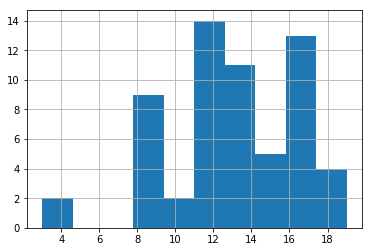

In [21]:
training_data_df[BEST_EPOCH].hist()

In [22]:
training_data_df[TOTAL_DURATION].describe()

count      60.000000
mean     5046.833333
std       609.999782
min      4246.000000
25%      4654.250000
50%      4997.000000
75%      5328.500000
max      7480.000000
Name: Total_Duration(s), dtype: float64

In [23]:
training_data_df.groupby([EXECUTION_NUMBER]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Execution_Number,,,,,,,,
0,60.0,0.858247,0.00472,0.847876,0.855694,0.857759,0.861559,0.870012


In [24]:
rp.summary_cont(training_data_df[TEST_F1_MEASURE])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Test_F1_Measure,60.0,0.858247,0.00472,0.000609,0.857027,0.859466


In [25]:
rp.summary_cont(training_data_df.groupby(EMBEDDING))[TEST_F1_MEASURE]

,N,Mean,SD,SE,95% Conf.,Interval
Embedding,,,,,,
No,4,0.856364,0.007229,0.003614,0.849280,0.863449
fasttext,8,0.857356,0.005669,0.002004,0.853428,0.861284
fasttext-lc,8,0.858471,0.003285,0.001161,0.856194,0.860747
glove,4,0.856662,0.004820,0.002410,0.851939,0.861386
glove-lc,4,0.861305,0.003406,0.001703,0.857968,0.864643
wang2vec,8,0.857722,0.006839,0.002418,0.852982,0.862461
wang2vec-lc,8,0.859456,0.005333,0.001885,0.855761,0.863152
word2vec,8,0.858537,0.002836,0.001003,0.856571,0.860502
word2vec-lc,8,0.858144,0.003527,0.001247,0.855699,0.860588


In [26]:
# Calculating effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

def print_anova(parameter):
    # Fits the model with the interaction term
    # This will also automatically include the main effects for each factor
    model = ols('Test_F1_Measure ~ C({0})'.format(parameter), training_data_df).fit()
    # Seeing if the overall model is significant
    print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .20f}")
    print(model.summary())
    res = sm.stats.anova_lm(model, typ= 2)
    print(res)
    print(anova_table(res))
    mc = statsmodels.stats.multicomp.MultiComparison(training_data_df[TEST_F1_MEASURE], training_data_df[parameter])
    mc_results = mc.tukeyhsd()
    print(mc_results)

In [27]:
print_anova(EMBEDDING)

Overall model F( 8, 51) =  0.430, p =  0.89765856461225390639
                            OLS Regression Results                            
Dep. Variable:        Test_F1_Measure   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                    0.4299
Date:                Tue, 04 Jun 2019   Prob (F-statistic):              0.898
Time:                        15:37:30   Log-Likelihood:                 238.68
No. Observations:                  60   AIC:                            -459.4
Df Residuals:                      51   BIC:                            -440.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [28]:
pd.set_option('display.max_columns', 1000)
training_data_df_2 = pd.DataFrame(training_data, columns=columns)
training_data_df_2 = training_data_df_2[training_data_df_2[DOMAIN_SPECIFIC] == True]
training_data_df_2.sort_values(by=TRAINING_ID)[TRAINING_ID,TEST_F1_MEASURE]

KeyError: ('Training_ID', 'Test_F1_Measure')